# Ellipsoidal nested rejection sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data. For a tutorial on nested sampling, see: [INSERT LINK to NESTED SAMPLING TUTORIAL NOTEBOOK].

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

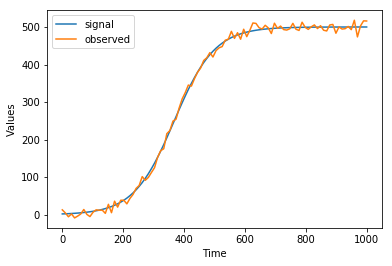

In [1]:
import os
os.chdir('../')
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedSampling(log_likelihood, log_prior)

# Set dynamic enlargement factor
sampler._sampler.set_dynamic_enlargement_factor(True)

# Set sampler marginal likelihood threshold
sampler.set_marginal_log_likelihood_threshold(0.005)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested Ellipsoidal Rejection sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:00.0 -inf          1             
0     2       0:00.0 -inf          1             
0     3       0:00.0 -inf          1             
0     4       0:00.0 -inf          1             
0     5       0:00.0 -inf          1             
0     21      0:00.0 -inf          1             
0     41      0:00.0 -inf          1             
0     61      0:00.0 -inf          1             
0     81      0:00.0 -inf          1             
0     101     0:00.0 -inf          1             
0     121     0:00.0 -inf          1             
0     141     0:00.0 -inf          1             
0     161     0:00.0 -inf          1             
0     181     0:00.0 -inf          1             
0     201     0:00.0 -inf          1             
0     221     0:00.0 -inf          1             
0  

3160  2269    0:03.0 -31.24508887  0.596328294   
3180  2278    0:03.1 -30.60175912  0.596909208   
3200  2285    0:03.1 -29.90979812  0.597737943   
3220  2287    0:03.1 -29.12320648  0.599192863   
3240  2295    0:03.1 -28.35213019  0.599873311   
3260  2304    0:03.2 -27.62992458  0.600419727   
3280  2314    0:03.2 -26.94431147  0.600834202   
3300  2319    0:03.2 -26.40455791  0.601867219917
3320  2325    0:03.2 -25.84114202  0.602765167   
3340  2333    0:03.2 -25.26547434  0.603405827   
3360  2337    0:03.3 -24.69836826  0.604532462   
3380  2343    0:03.3 -24.16602736  0.605402112104
3400  2351    0:03.3 -23.59247408  0.606017771   
3420  2352    0:03.3 -23.04568081  0.607480394   
3440  2355    0:03.3 -22.50561024  0.60868695    
3460  2360    0:03.4 -22.00509655  0.609639514041
3480  2366    0:03.4 -21.50442791  0.61046166    
3500  2379    0:03.4 -20.964773    0.610433071   
3520  2382    0:03.4 -20.48586437  0.611601019   
3540  2386    0:03.4 -19.96932732  0.612638970158


6600  3444    0:06.8 -0.0320684    0.670740941   
6620  3450    0:06.8 -0.030485     0.67101715    
6640  3455    0:06.8 -0.0289806    0.671364028   
6660  3462    0:06.8 -0.0275511    0.671564947   
6680  3472    0:06.8 -0.0261928    0.671549236   
6700  3482    0:06.9 -0.0249021    0.671533625   
6720  3494    0:06.9 -0.0236755    0.671375464684
6740  3503    0:06.9 -0.0225098    0.671431596781
6760  3515    0:06.9 -0.0214019    0.671274799   
6780  3530    0:07.0 -0.020349     0.67090737    
6800  3546    0:07.0 -0.0193482    0.6704724     
6820  3549    0:07.0 -0.0183971    0.670950888   
6840  3554    0:07.0 -0.017493     0.671287129   
6860  3560    0:07.1 -0.0166336    0.671551814   
6880  3566    0:07.1 -0.0158167    0.671815072   
6900  3574    0:07.1 -0.0150402    0.671937984   
6920  3577    0:07.1 -0.014302     0.672406682   
6940  3580    0:07.1 -0.0136003    0.672873161   
6960  3588    0:07.2 -0.0129331    0.672992101754
6980  3599    0:07.2 -0.0122989    0.672903885   


## Plot posterior samples versus true parameter values (dashed lines)

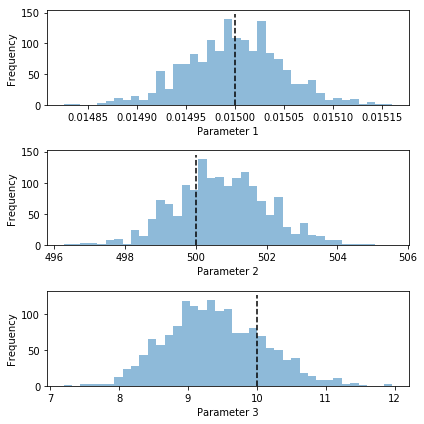

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

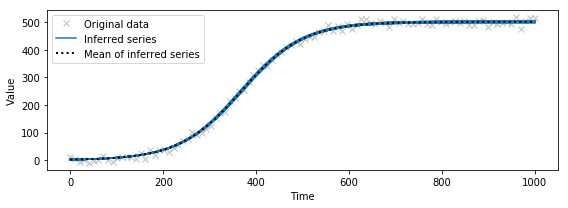

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -375.488919891 ± 0.0767923356872


## Effective sample size

In [7]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 2257.47443688
